# Propensity Modeling

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

from time import time
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectFromModel
import tensorflow as tf
import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
import matplotlib.pyplot as plt
import itertools
from sklearn import grid_search, cross_validation
from sklearn.linear_model import LogisticRegression
pd.set_option('display.max_columns', 1000)

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## Load Data:

In [2]:
%%time
with open("../Data/Feature_Engineering/df_features_normalize.p", "rb" ) as f:
    data_features = pickle.load(f)
with open( "../Data/Feature_Engineering/df_label.p", "rb" ) as f:
    data_label = pickle.load(f)

CPU times: user 759 ms, sys: 4.94 s, total: 5.7 s
Wall time: 2min 30s


In [3]:
%%time
X = data_features
Y = data_label

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.96 µs


In [4]:
print(X.shape)
bar_80 = np.floor(X.shape[0]*0.8).astype(int)
bar_80=bar_80+1
bar_80

(220047, 2357)


176038

In [5]:
X_train=X[:bar_80]
Y_train=Y[:bar_80]
X_test=X[bar_80:]
Y_test=Y[bar_80:]

## 1.0 Feature Selection

In [6]:
%%time
clf=RandomForestClassifier(n_estimators=100,criterion='gini',max_features= 10, 
                           min_samples_leaf=3, bootstrap= False, max_depth= 25, 
                           min_samples_split= 15)

clf.fit(X_train, Y_train)

clf.feature_importances_ 
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
print(X_new.shape)

(220047, 74)
CPU times: user 27.2 s, sys: 955 ms, total: 28.1 s
Wall time: 28.4 s


In [26]:
b=importances.reshape(len(importances),1)
a=len(b)


In [27]:
a

2357

In [28]:
b.shape

(2357, 1)

<Container object of 2357 artists>

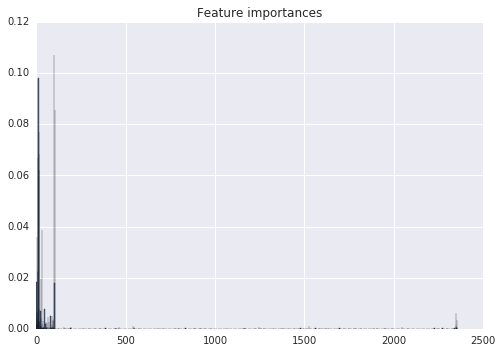

In [29]:
importances=clf.feature_importances_ 

plt.figure()
plt.title("Feature importances")
plt.bar(range(a),b)
# x=range(importances)
# a=importances.reshape(len(importances),1)

# sns.set_style("whitegrid")
# tips = sns.load_dataset("tips")
# ax = sns.barplot(data=a)

In [ ]:
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [16]:
a=importances.reshape(len(importances),1)

array([[  1.81668957e-02],
       [  6.66506147e-03],
       [  3.57077642e-02],
       ..., 
       [  5.25015503e-04],
       [  3.19278728e-06],
       [  2.79883208e-04]])

In [7]:
X_train=X_new[:bar_80]
Y_train=Y[:bar_80]
X_test=X_new[bar_80:]
Y_test=Y[bar_80:]
print(X_train.shape)

(176038, 74)


## 1. Logistic Regression Model:

### 2.1 Random Search

In [32]:
# Report function
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [36]:
clf = linear_model.LogisticRegression()

param_dist = {"C": [0.01, 0.1, 1, 10, 100],
              "penalty":['l1','l2']}

n_iter_search = 10
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)
start = time()
random_search.fit(X_train, Y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)
# 5, 500 is not the optimal one. 1, 1000 is far more better.

RandomizedSearchCV took 152.45 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.894 (std: 0.001)
Parameters: {'penalty': 'l1', 'C': 100}

Model with rank: 2
Mean validation score: 0.894 (std: 0.001)
Parameters: {'penalty': 'l1', 'C': 10}

Model with rank: 3
Mean validation score: 0.894 (std: 0.001)
Parameters: {'penalty': 'l2', 'C': 100}



---
### 2.2 Model Training

In [62]:
%%time
clf = linear_model.LogisticRegression(C=100,penalty='l2')

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 24.6 µs


In [63]:
%%time
clf.fit(X_train, Y_train)

CPU times: user 8.93 s, sys: 35 ms, total: 8.97 s
Wall time: 8.97 s


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 2. Result Analysis

In [64]:
Y_pred = clf.predict(X_test)
print('Classification accuracy rate is: ',sum(Y_pred==Y_test)/len(Y_test))

Classification accuracy rate is:  0.89109045877


In [65]:
# Result with 100 trees
print(classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

          0       0.90      0.98      0.94     37065
          1       0.78      0.43      0.56      6944

avg / total       0.88      0.89      0.88     44009



In [66]:
1-sum(Y_test)/len(Y_test)

0.84221409257197388

In [52]:
def plot_confusion_matrix(cm, classes, normalize=False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix is:
 [[36214   851]
 [ 3942  3002]]

Plot of Confusion Matrix is:


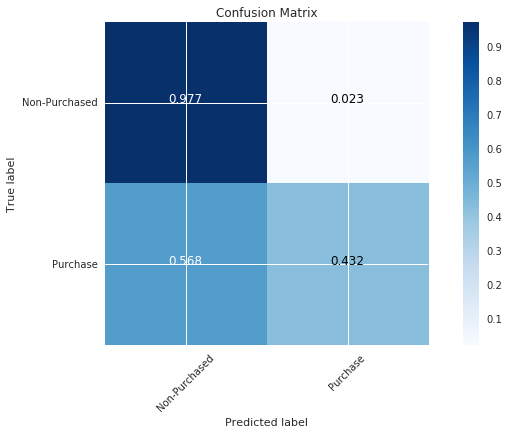

In [14]:
Y_pred = clf.predict(X_test)
# cfm = confusion_matrix(y_true, y_pred, labels
cfm = confusion_matrix(Y_test, Y_pred, labels=[0, 1])
print('Confusion Matrix is:\n',confusion_matrix(Y_test, Y_pred))
print('\nPlot of Confusion Matrix is:')
plt.figure(figsize=(10,6))
plot_confusion_matrix(cfm, classes=["Non-Purchased", "Purchase"], normalize=True)

Confusion Matrix is:
 [[36214   851]
 [ 3942  3002]]

Plot of Confusion Matrix is:


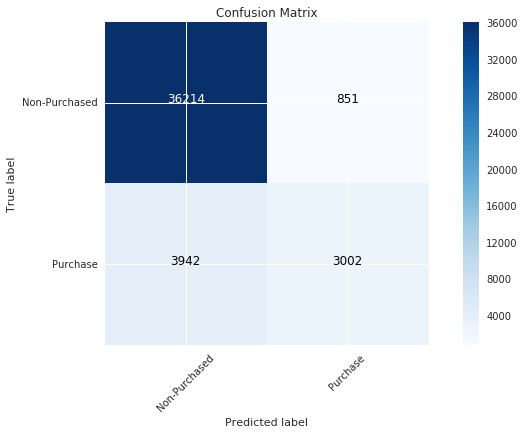

In [54]:
Y_pred = clf.predict(X_test)
# cfm = confusion_matrix(y_true, y_pred, labels
cfm = confusion_matrix(Y_test, Y_pred, labels=[0, 1])
print('Confusion Matrix is:\n',confusion_matrix(Y_test, Y_pred))
print('\nPlot of Confusion Matrix is:')
plt.figure(figsize=(10,6))
plot_confusion_matrix(cfm, classes=["Non-Purchased", "Purchase"], normalize=False)

In [16]:
clf.predict_proba(X_test)

array([[  9.98499785e-01,   1.50021518e-03],
       [  9.99217035e-01,   7.82965267e-04],
       [  9.98514204e-01,   1.48579571e-03],
       ..., 
       [  9.62262509e-01,   3.77374910e-02],
       [  9.64568832e-01,   3.54311684e-02],
       [  9.80289249e-01,   1.97107513e-02]])

In [67]:
n_classes=1
Y_prob = clf.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test, Y_prob[:,1])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), Y_prob[:,1].ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

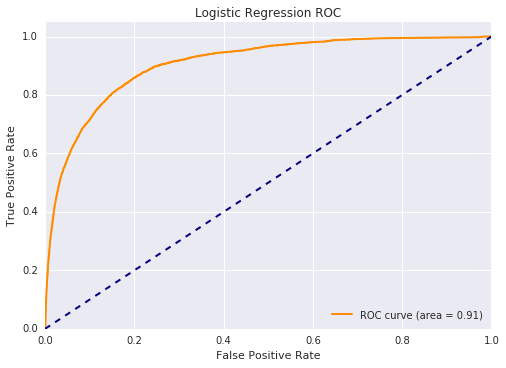

In [68]:
# Compute ROC curve and ROC area for each class
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC')
plt.legend(loc="lower right")
plt.show()

In [69]:
Y_prob

array([[  9.98499785e-01,   1.50021518e-03],
       [  9.99217035e-01,   7.82965267e-04],
       [  9.98514204e-01,   1.48579571e-03],
       ..., 
       [  9.62262509e-01,   3.77374910e-02],
       [  9.64568832e-01,   3.54311684e-02],
       [  9.80289249e-01,   1.97107513e-02]])

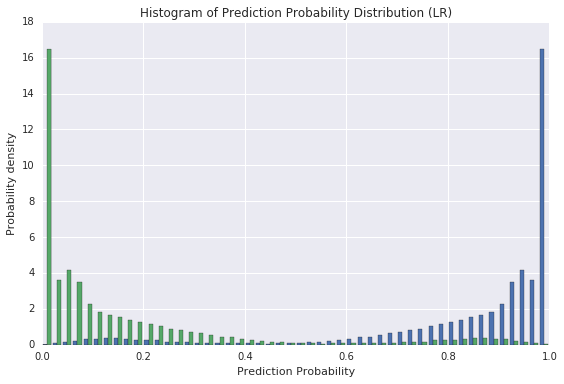

In [84]:
import seaborn as sns
sns.set(color_codes=True)

num_bins = 50
fig, ax = plt.subplots()

n, bins, patches = ax.hist(Y_prob, num_bins, normed=1)

# ax.plot(bins, y, '--')
ax.set_xlabel('Prediction Probability')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of Prediction Probability Distribution (LR)')


# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


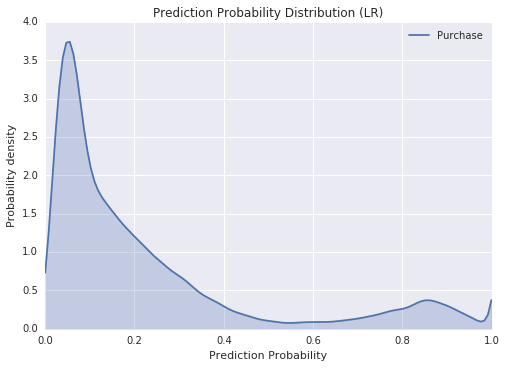

In [78]:
import seaborn as sns
sns.set(color_codes=True)

Y_prob = clf.predict_proba(X_test)

sns.kdeplot(Y_prob[:,1], shade=True,cut=0, label="Purchase");

plt.xlabel('Prediction Probability')
plt.ylabel('Probability density')
plt.title(r'Prediction Probability Distribution (LR)')

/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


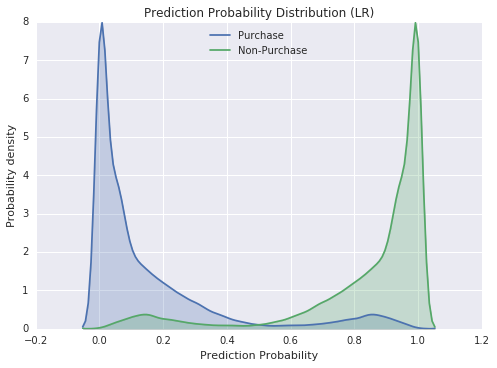

In [93]:
import seaborn as sns
sns.set(color_codes=True)

Y_prob = clf.predict_proba(X_test)

sns.kdeplot(Y_prob[:,1], shade=True, label="Purchase");
sns.kdeplot(Y_prob[:,0], shade=True, label="Non-Purchase");

# sns.kdeplot(Y_prob[:,1], shade=True,cut=0, label="Purchase");
# sns.kdeplot(Y_prob[:,0], shade=True,cut=0,label="Non-Purchase");

plt.xlabel('Prediction Probability')
plt.ylabel('Probability density')
plt.title(r'Prediction Probability Distribution (LR)')

In [81]:
Y_prob[:,1]

array([ 0.00150022,  0.00078297,  0.0014858 , ...,  0.03773749,
        0.03543117,  0.01971075])

In [82]:
Y_prob[:,0]

array([ 0.99849978,  0.99921703,  0.9985142 , ...,  0.96226251,
        0.96456883,  0.98028925])

In [12]:
logreg=linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
                                        intercept_scaling=1, class_weight=None, random_state=1, solver='liblinear', max_iter=10000, 
                                        multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

In [13]:
%%time
logreg.fit(X_train, Y_train)

CPU times: user 5.83 s, sys: 81 ms, total: 5.91 s
Wall time: 6.04 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Grid Search

In [19]:
%%time
gs = grid_search.GridSearchCV(
estimator = LogisticRegression(class_weight=None, max_iter=10000, penalty='l2'),
param_grid ={'C': [10**-i for i in range(-2, 3)]},
cv=cross_validation.KFold(n=len(Y_train), n_folds=10))

CPU times: user 1 ms, sys: 0 ns, total: 1 ms
Wall time: 681 µs


In [78]:
# gs = grid_search.GridSearchCV(
# estimator=LogisticRegression(),
# param_grid={'C': [10**-i for i in range(-5, 5)], 'class_weight': [None, 'auto']},
# cv=cross_validation.KFold(n=len(Y_train), n_folds=10))

In [20]:
%%time
gs.fit(X_train, Y_train)

CPU times: user 4min 6s, sys: 25.5 s, total: 4min 32s
Wall time: 4min 12s


GridSearchCV(cv=sklearn.cross_validation.KFold(n=176038, n_folds=10, shuffle=False, random_state=None),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [100, 10, 1, 0.1, 0.01]}, pre_dispatch='2*n_jobs',
       refit=True, scoring=None, verbose=0)

In [21]:
gs.best_estimator_

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
%%time
logreg=linear_model.LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=10,
          verbose=0, warm_start=False)
logreg.fit(X_train, Y_train)

CPU times: user 241 ms, sys: 83 ms, total: 324 ms
Wall time: 324 ms


In [23]:
Y_pred = logreg.predict(X_test)
sum(Y_pred==Y_test)/Y_test.shape[0]

0.84221409257197388

### Predict confidence scores for samples:

In [62]:
Y_prob=logreg.decision_function(X)

In [63]:
Y_prob

array([-7.56, -7.64, -5.08, ..., -3.39, -3.45, -3.35])

### Log of probability estimates:

In [64]:
Y_logProb=logreg.predict_log_proba(X_train)

In [65]:
print(len(np.exp(Y_logProb)))
print(np.exp(Y_logProb))
print('first column is prob of choosing label 0, second column is the prob of choosing label 1')

176038
[[  9.99e-01   5.22e-04]
 [  1.00e+00   4.79e-04]
 [  9.94e-01   6.18e-03]
 ..., 
 [  1.00e+00   1.25e-04]
 [  9.99e-01   6.72e-04]
 [  9.99e-01   8.65e-04]]
first column is prob of choosing label 0, second column is the prob of choosing label 1


### Predicted labels:

In [66]:
Y_pred = logreg.predict(X_test)

In [67]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [68]:
# more iteration
sum(Y_pred==Y_test)/Y_test.shape[0]

0.88872730577836356

In [69]:
sum(Y_pred==Y_test)/Y_test.shape[0] # less iteration

0.88872730577836356

In [70]:
print('percentage of 0s in true labels:', 1-sum(Y_test)/Y_test.shape[0])

percentage of 0s in true labels: 0.842214092572


In [71]:
def plot_confusion_matrix(cm, classes, normalize=False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix is:
 [[36217   848]
 [ 4049  2895]]

Plot of Confusion Matrix is:


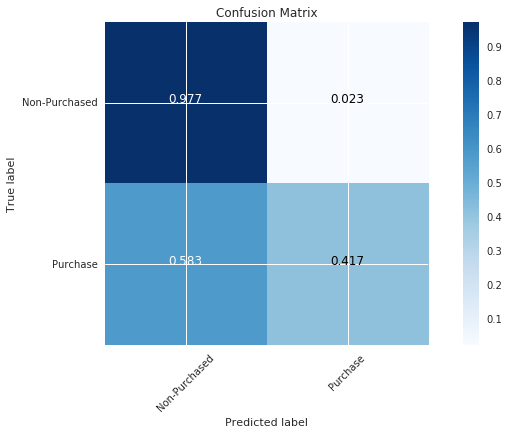

In [72]:
Y_pred = logreg.predict(X_test)
# cfm = confusion_matrix(y_true, y_pred, labels
cfm = confusion_matrix(Y_test, Y_pred, labels=[0, 1])
print('Confusion Matrix is:\n',confusion_matrix(Y_test, Y_pred))
print('\nPlot of Confusion Matrix is:')
plt.figure(figsize=(10,6))
plot_confusion_matrix(cfm, classes=["Non-Purchased", "Purchase"], normalize=True)

In [32]:
# Compute confusion matrix
cfm = confusion_matrix(Y_test, Y_pred,labels=range(0,1))
np.set_printoptions(precision=2)

print('\nPlot of Confusion Matrix without nomalize is:')
plt.figure(figsize=(14,10))
plot_confusion_matrix(cfm, classes=range(0,1), normalize=False)
plt.show()
print('\nPlot of Confusion Matrix with nomalize is:')
plt.figure(figsize=(14,10))
plot_confusion_matrix(cfm, classes=range(0,1), normalize=True)
plt.show()

NameError: name 'clf' is not defined

In [19]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
sum(Y_pred==Y_test)/Y_test.shape[0]

0.84221409257197388